In [1]:
import numpy as np
import pandas as pd

#for QQPlot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [6]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


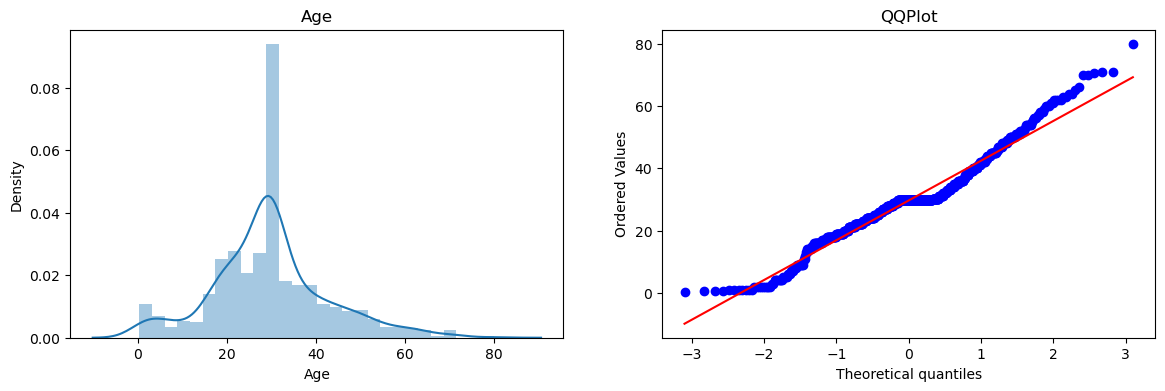

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age")

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQPlot')
plt.show()




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


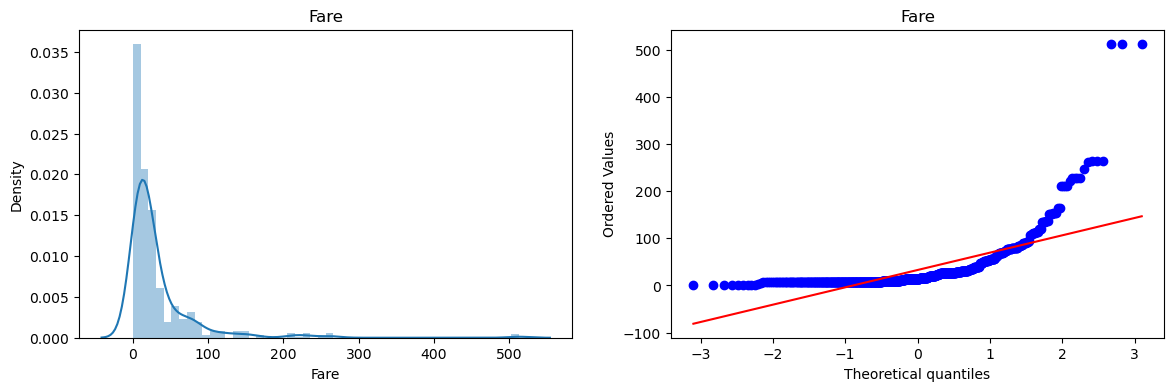

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title("Fare")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare')
plt.show()

In [11]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

print("Accuracy without function transformer = ",accuracy_score(y_pred,y_test))

Accuracy without function transformer =  0.7430167597765364


In [19]:
trf = FunctionTransformer(func=np.log1p)

In [20]:
x_train = trf.fit_transform(x_train)
x_test = trf.transform(x_test)

In [21]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

print("Accuracy with function transformer = ",accuracy_score(y_pred,y_test))

Accuracy with function transformer =  0.7877094972067039


After function transformer


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


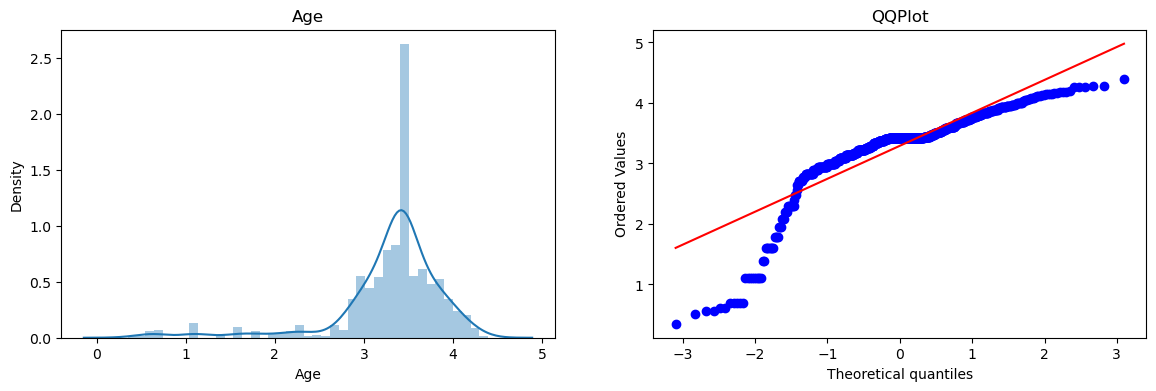

In [24]:
print("After function transformer")

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age")

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQPlot')
plt.show()

After funcion transformer


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


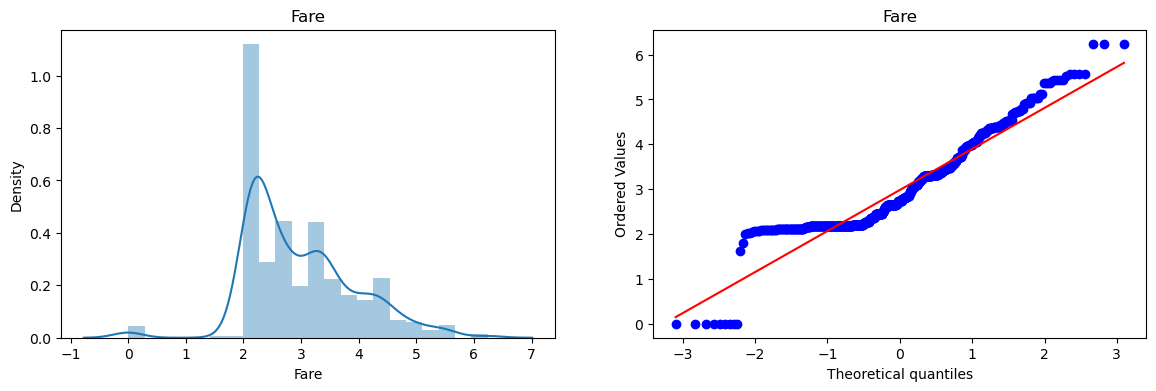

In [25]:
print("After funcion transformer")
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title("Fare")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare')
plt.show()